In [1]:
import pandas as pd

datapath = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(datapath + 'train.csv', index_col ='id')
test = pd.read_csv(datapath + 'test.csv', index_col ='id')
submission = pd.read_csv(datapath + 'sample_submission.csv', index_col ='id')

In [2]:
train.shape, test.shape

((300000, 24), (200000, 23))

In [3]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [4]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


In [5]:
test.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


#### 피처 요약표 만들기

In [6]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고유값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

resumetable(train)

데이터셋 형상 : (300000, 24)


,피처,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


In [7]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_0 고윳값: [2 1 3]
ord_1 고윳값: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [8]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_3 고윳값: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' '

In [9]:
print('day 고윳값:',train['day'].unique())
print('month 고윳값:', train['month'].unique())
print('target 고윳값:', train['target'].unique())

day 고윳값: [2 7 5 4 3 1 6]
month 고윳값: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값: [0 1]


### 데이터 시각화

In [10]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

* 수치형 데이터의 분포를 파악할 땐 주로 displot()을 사용하고 범주형 데이터의 분포를 파악할 땐 countplot()을 사용

타겟값 분포


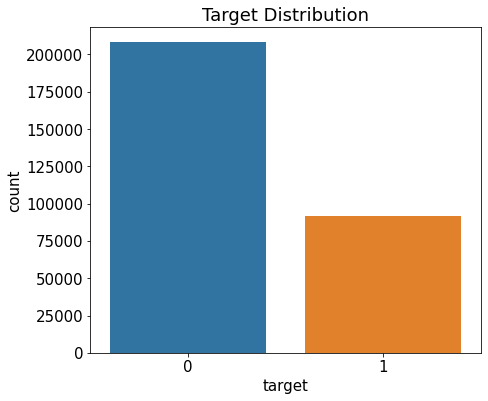

In [11]:
mpl.rc('font', size=15) # 폰트 크기 설정
plt.figure(figsize=(7, 6)) # Figure 크기 설정

# 타겟값 분포 카운트플롯
ax = sns.countplot(x='target', data=train)
ax.set_title('Target Distribution');

In [12]:
print(ax.patches)

<Axes.ArtistList of 2 patches>


In [13]:
rectangle = ax.patches[0] # 첫번째 Rectangle 객체
print('사각형의 높이:', rectangle.get_height())
print('사각형의 너비:', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:', rectangle.get_x())

사각형의 높이: 208236
사각형의 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4


In [14]:
print('텍스트 위치의 x좌표:', rectangle.get_x() + rectangle.get_width() / 2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + len(train) * 0.001)

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 208536.0


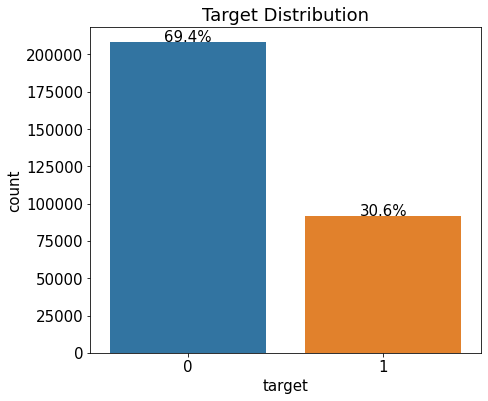

In [15]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타겟값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타겟값 비율
        
        # (x, y) 좌표에 텍스트 입력
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬
        
plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))  # 비율 표시
ax.set_title('Target Distribution');

이진 피처 분포

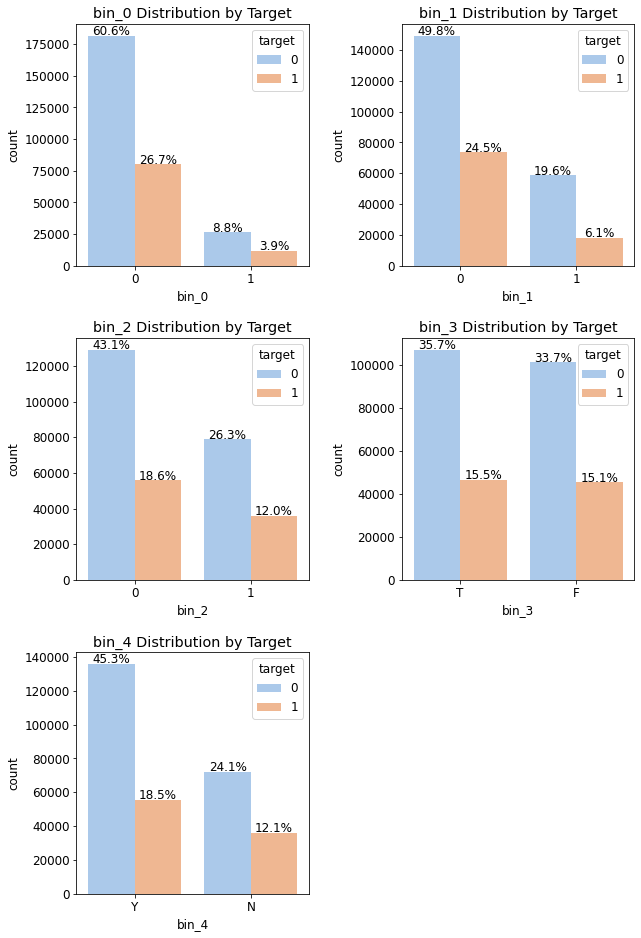

In [16]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치
# 3행 2열 Figure(틀) 준비
mpl.rc('font', size=12)
grid = gridspec.GridSpec(3, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 16))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['bin_0','bin_1', 'bin_2', 'bin_3', 'bin_4']  # 피처 목록

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    # ax축에 타겟값 분포 카운트플롯 그리기
    sns.countplot(x=feature,
                  data=train,
                  hue='target',
                  palette='pastel', # 그래프 색상 설정
                  ax=ax)
    
    ax.set_title(f'{feature} Distribution by Target')  # 그래프 제목 설정
    write_percent(ax, len(train))                      # 비율 표시

위의 결과로 이진 피처는 특정 타겟값에 치우치지 않았음을 확인가능